In [4]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
#importing data from local machine
import io
from google.colab import files
uploaded = files.upload()


data = pd.read_csv(io.BytesIO(uploaded['khanacademydataset.csv']))


Saving khanacademydataset.csv to khanacademydataset.csv


I was getting error while using pd.read_csv directly. The reason was that Colab cannot read files from  local device, it's running on a server on the cloud, and doesn't have access to your local filesystem. You need to upload your files. There are many ways to accomplish this, here I have used one of the methods suggested at stackoverflow.

In [ ]:
data.head()

,Unnamed: 0,video_id,video_title,video_channel,publish_date,views,like_count,dislike_count,comments
0,0,1vMVqhh_wi4,Help Khan Academy Double Down On Our Efforts,Khan Academy,2021-03-16T20:08:39Z,83589,2400,58,184
1,1,imlwmNO9xlY,The elements of a drama | Reading | Khan Academy,Khan Academy,2020-04-28T15:04:29Z,67688,521,68,0
2,2,Zr1xLtSMMLo,The elements of a story | Reading | Khan Academy,Khan Academy,2020-04-10T20:29:26Z,240352,2734,243,0
3,3,zFNnbxCZPBU,The elements of a poem | Reading | Khan Academ...,Khan Academy,2020-04-10T20:21:53Z,222332,1398,173,0
4,4,MAu3e5GZo4k,Understanding theme | Reading | Khan Academy,Khan Academy,2020-04-06T17:20:43Z,389258,3046,454,0


Data cleaning tasks we are going to cover:

1.   Remove unwanted columns
2.   Missing values check
3.   Duplicate values check
4.   Remove time from publish_date column
6.   Time frame of collected data 












In [ ]:
#Remove unwanted columns 
data.columns

In [6]:
#unnamed: 0 is created by pandas as we haven't specify that csv file contains index for dataframe.

del data['Unnamed: 0']

In [ ]:
#check if column is removed
data.columns

In [ ]:
#missing values check
data.isnull().sum()

In [7]:
#duplicate values check
data.duplicated().sum()

1

In [8]:
#getting the duplicate row
data.loc[data.duplicated(), :]

,video_id,video_title,video_channel,publish_date,views,like_count,dislike_count,comments
294,oTbvYGH_Hiw,Electoral college | American civics | US Histo...,Khan Academy,2011-07-26T00:13:23Z,434784,1651,70,240


In [9]:
#let's drop the duplicate row. inplace True means to drop it from original data frame as well
data.drop_duplicates(inplace=True)

In [10]:
#remove time from publish_date column
#convert the date column to pandas date time format and parse the date part from it
data['publish_date'] = pd.to_datetime(data['publish_date']).dt.date
data['publish_date']



0      2021-03-16
1      2020-04-28
2      2020-04-10
3      2020-04-10
4      2020-04-06
          ...    
487    2008-07-10
488    2008-06-12
489    2008-06-10
490    2008-06-08
491    2008-06-08
Name: publish_date, Length: 491, dtype: object

**Exploratory Data Analysis**
Let's analyse the data to find out:

*   ***Views:*** What gets people to hear an idea?
* **Popular content during pandemic**: What type of conetnt people liked/viewed in lockdown?  
*   **Comments:** What kinds of topics produce discussions?







In [11]:
#func for top 5 videos 
def topfive(x):
  top_five= data.sort_values(by=x,ascending=False)[:5]

  
  top_five['video_title']=top_five['video_title'].apply(lambda x: x[:28])
  return top_five


In [12]:
most_views=topfive("views")
most_views

,video_id,video_title,video_channel,publish_date,views,like_count,dislike_count,comments
306,riXcZT2ICjA,Introduction to limits | Lim,Khan Academy,2011-05-19,4775228,21131,708,1017
450,1xSQlwWGT8M,Introduction to the atom | C,Khan Academy,2009-08-25,2614784,8516,425,971
303,oRKxmXwLvUU,Calculating average velocity,Khan Academy,2011-06-11,2542549,7018,407,738
491,xyAuNHPsq-g,Introduction to matrices,Khan Academy,2008-06-08,2389555,11567,345,686
414,mfgCcFXUZRk,Electron Transport Chain,Khan Academy,2009-12-11,2367556,11776,318,1034


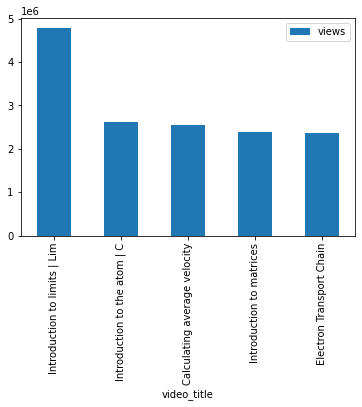

In [43]:
#let's plot a graph for our top five videos
views_plot=most_views.plot(kind='bar',x="video_title",y="views")
plt.show()



In [ ]:
#views stats
data['views'].describe()

In [13]:
most_commented=topfive("comments")
most_commented

,video_id,video_title,video_channel,publish_date,views,like_count,dislike_count,comments
57,iMbAu2Oh7PA,Sunni and Shia Islam part 1,Khan Academy,2017-02-22,729522,6059,512,1117
414,mfgCcFXUZRk,Electron Transport Chain,Khan Academy,2009-12-11,2367556,11776,318,1034
306,riXcZT2ICjA,Introduction to limits | Lim,Khan Academy,2011-05-19,4775228,21131,708,1017
450,1xSQlwWGT8M,Introduction to the atom | C,Khan Academy,2009-08-25,2614784,8516,425,971
437,ijLc52LmFQg,Phases of Meiosis,Khan Academy,2009-09-24,1605332,8017,345,890


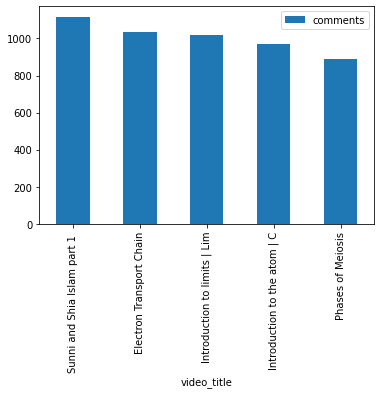

In [35]:
#comments chart
views_plot=most_commented.plot(kind='bar',x="video_title",y="comments")
plt.show()

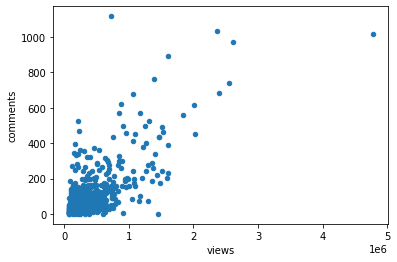

In [41]:
#scatter plot
correlation_plot=data.plot(kind='scatter',x="views",y="comments")
plt.show()

In [28]:
#correlation b/w comments and views
data[["views","comments"]].corr(method='pearson')

,views,comments
views,1.000000,0.707372
comments,0.707372,1.000000


Observations

*   Most viewed video on Khan academy teachers is *Introduction to Limits* with 4775228 views. 
*   The most discussed video on Khan academy is S*unni and Shia Islam part 1* with 1117 comments. On second spot we have a video related to *Electron Transport Chain* topic and it has 1034 comments.

*   The correlation metrics shows that views and comments are highly correlated.Since the r value is 0.7 we can say that comments and viewsare correlated.
*   The top five most discussed and viewed videos are mainly from Maths, Chemistry and biology and physics genre.






In [ ]:
#saving data as csv file
from google.colab import files
data.to_csv('khanacademydataset_cleaned.csv') 
files.download("khanacademydataset_cleaned.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>